In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_NO2.pkl


In [3]:
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [5]:
df=df[['City','Date','AQI','AQI_Bucket','PM2.5', 'PM10', 'NO', 'NO2']]

In [6]:
cities=pd.unique(df['City'])
column1= cities+'PM2.5'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [7]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['PM2.5']))
    final_df[i][-n:]=np.array(df[df['City']==city]['PM2.5'])

In [9]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [10]:
final_df.tail()

,AhmedabadPM2.5,AizawlPM2.5,AmaravatiPM2.5,AmritsarPM2.5,BengaluruPM2.5,BhopalPM2.5,BrajrajnagarPM2.5,ChandigarhPM2.5,ChennaiPM2.5,DelhiPM2.5,...,JaipurPM2.5,JorapokharPM2.5,KochiPM2.5,KolkataPM2.5,LucknowPM2.5,MumbaiPM2.5,PatnaPM2.5,ShillongPM2.5,TalcherPM2.5,ThiruvananthapuramPM2.5
2020-01-01,54.211613,NaN,47.416452,51.180968,39.313226,72.615484,73.451786,45.361613,44.229677,157.112581,...,47.088710,62.062258,60.737000,94.279677,136.277419,72.870645,125.878710,31.644828,157.006452,35.939032
2020-02-01,73.890690,NaN,34.742414,56.107778,41.607241,51.250345,68.165172,42.322069,37.013448,121.484138,...,55.228276,75.804286,58.181379,84.142414,102.907586,66.967586,84.848966,48.668519,86.459310,41.407931
2020-03-01,45.255806,38.943810,22.588387,27.849355,38.193226,32.757857,64.351667,19.636129,31.876774,57.506452,...,34.323548,62.210870,36.490323,51.490645,64.301290,32.715806,64.320645,35.998710,41.408214,28.815161
2020-04-01,31.055667,20.974667,17.544667,18.525200,24.931667,43.542917,63.085333,14.349333,15.453333,44.940000,...,28.631333,43.419333,19.660333,24.420667,54.830667,22.849667,39.323333,30.162000,38.220588,18.987333
2020-05-01,44.100000,NaN,39.000000,31.830000,25.430000,28.000000,66.350000,11.870000,5.440000,61.750000,...,38.330000,39.200000,21.850000,14.680000,58.540000,13.080000,29.260000,7.070000,17.950000,17.580000


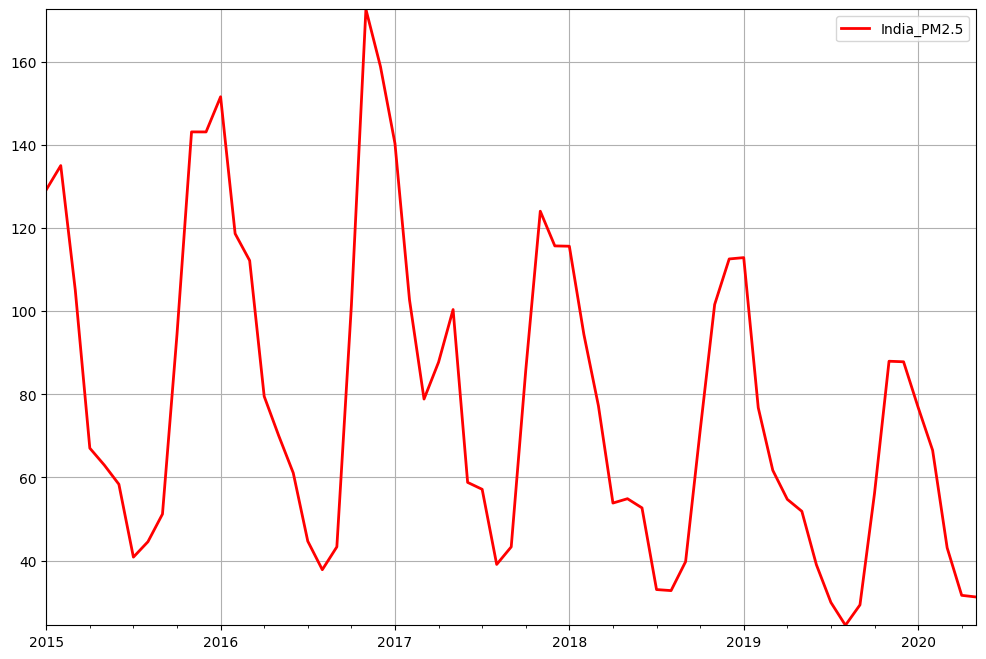

In [11]:
final_df['India_PM2.5']=final_df.mean(axis=1)
ax=final_df[['India_PM2.5']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [12]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadPM2.5,AizawlPM2.5,AmaravatiPM2.5,AmritsarPM2.5,BengaluruPM2.5,BhopalPM2.5,BrajrajnagarPM2.5,ChandigarhPM2.5,ChennaiPM2.5,DelhiPM2.5,...,JorapokharPM2.5,KochiPM2.5,KolkataPM2.5,LucknowPM2.5,MumbaiPM2.5,PatnaPM2.5,ShillongPM2.5,TalcherPM2.5,ThiruvananthapuramPM2.5,India_PM2.5
2019-01-01,89.456452,NaN,93.168387,41.538065,54.724516,NaN,111.368387,NaN,62.089677,204.347097,...,123.423478,NaN,202.110968,167.839677,65.840968,261.462581,NaN,105.538387,60.037419,112.875878
2019-02-01,61.619286,NaN,52.193929,46.604643,45.544286,NaN,91.514643,NaN,52.947857,122.316429,...,81.494286,NaN,127.873571,116.787500,54.662857,141.533571,NaN,76.457857,37.805714,76.765353
2019-03-01,66.989032,NaN,26.749355,51.216129,48.905161,NaN,84.693226,NaN,51.380323,84.150968,...,69.102069,NaN,72.317097,100.381613,30.410645,86.822903,NaN,50.186538,34.894839,61.708740
2019-04-01,96.889643,NaN,20.330333,51.792333,49.267333,NaN,81.327647,NaN,34.410000,82.311000,...,54.219565,NaN,42.204000,103.104000,20.569667,54.205000,NaN,41.223448,25.831379,54.729260
2019-05-01,52.941071,NaN,38.651290,50.498387,40.168387,NaN,53.880333,NaN,44.652581,89.748065,...,NaN,NaN,43.314839,81.790968,15.492258,56.438065,NaN,33.799333,22.856774,51.855205


In [13]:
df_2019.isna().sum()

AhmedabadPM2.5              0
AizawlPM2.5                13
AmaravatiPM2.5              1
AmritsarPM2.5               0
BengaluruPM2.5              0
BhopalPM2.5                 8
BrajrajnagarPM2.5           0
ChandigarhPM2.5             8
ChennaiPM2.5                0
DelhiPM2.5                  0
ErnakulamPM2.5             12
GurugramPM2.5               0
GuwahatiPM2.5               1
HyderabadPM2.5              0
JaipurPM2.5                 0
JorapokharPM2.5             3
KochiPM2.5                 12
KolkataPM2.5                0
LucknowPM2.5                0
MumbaiPM2.5                 0
PatnaPM2.5                  0
ShillongPM2.5               7
TalcherPM2.5                0
ThiruvananthapuramPM2.5     0
India_PM2.5                 0
dtype: int64

In [14]:
df_2019=df_2019.drop(['AizawlPM2.5','ErnakulamPM2.5','KochiPM2.5'],axis=1)

In [15]:
PM_2019 = df_2019.mean(axis=0)

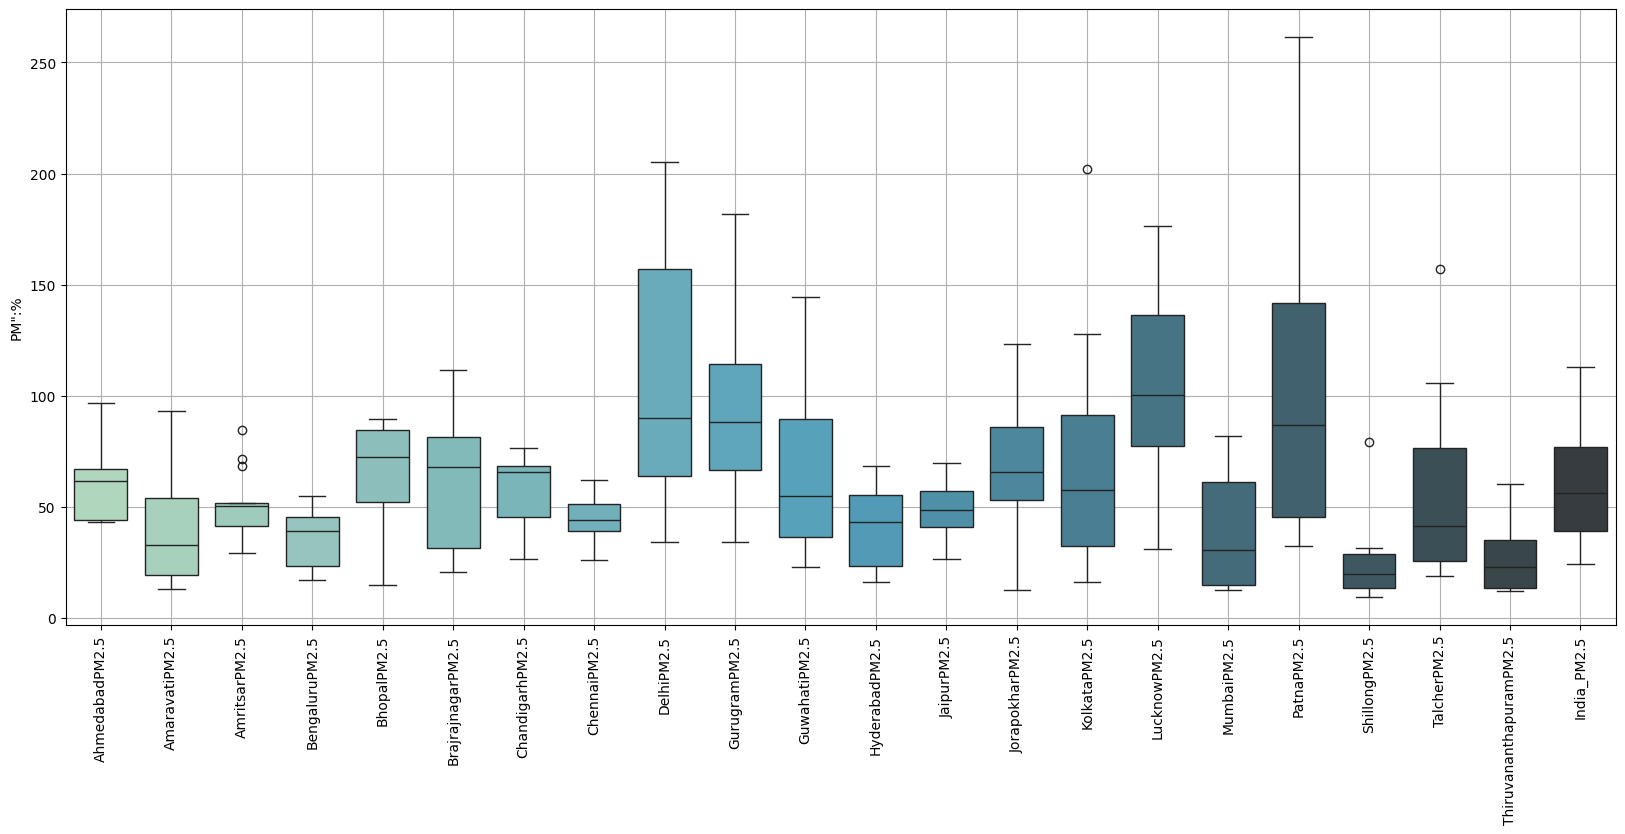

In [16]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('PM":%');
bplot.grid(True)

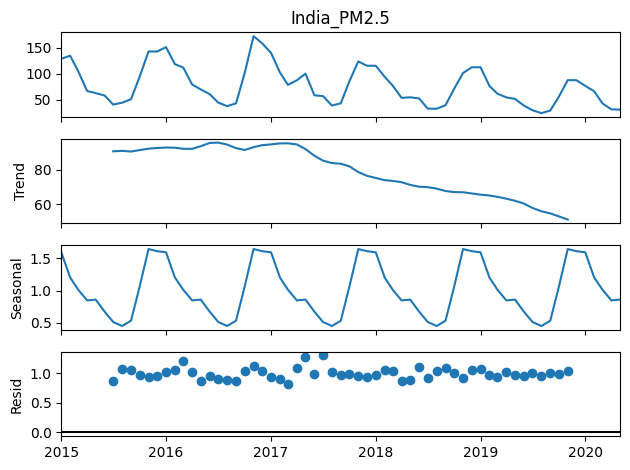

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_PM2_5=final_df['India_PM2.5']
result=seasonal_decompose(India_PM2_5,model='multiplicative')
result.plot();

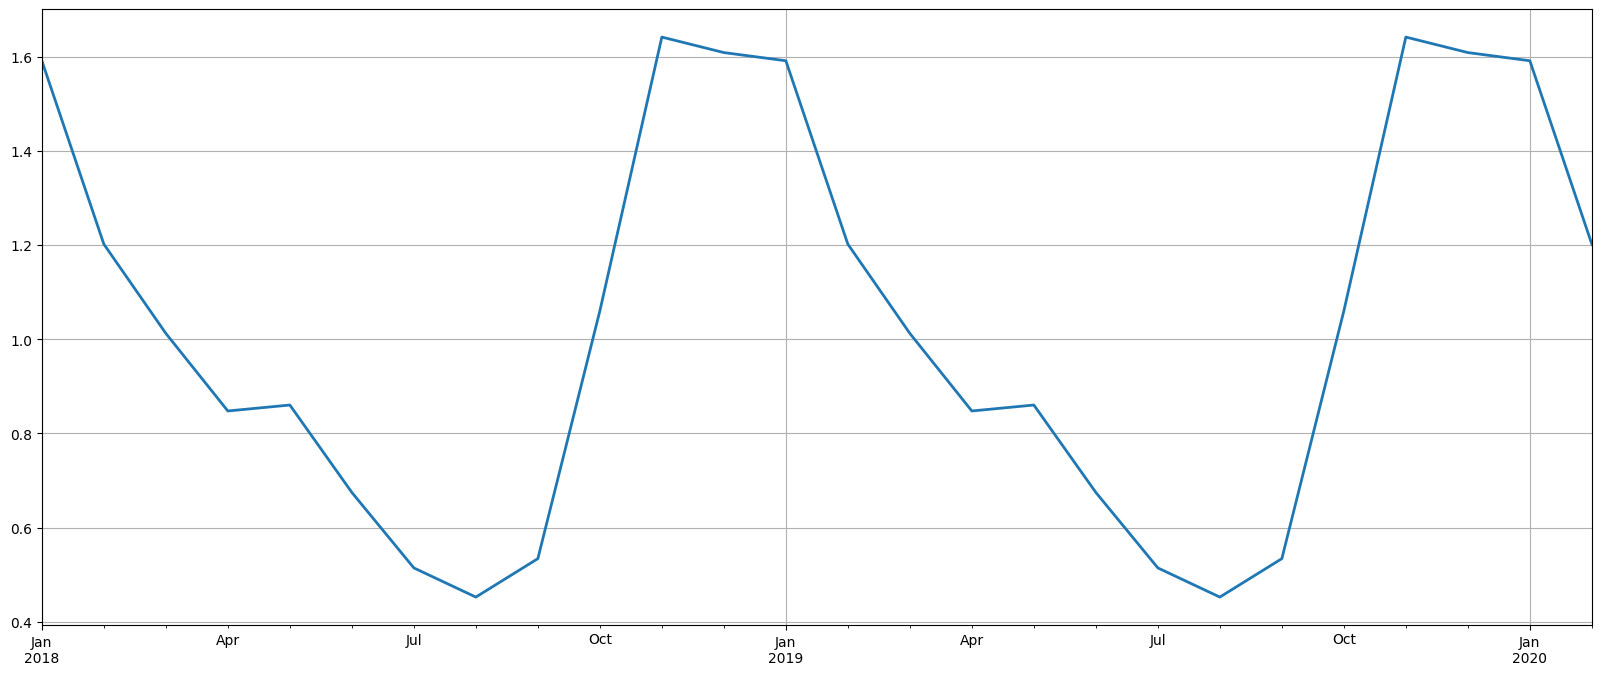

In [18]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [19]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;                              # for determining ARIMA orders

In [20]:
auto_arima(y=India_PM2_5,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -267.243
Date:                            Thu, 04 Jan 2024   AIC                            546.486
Time:                                    13:37:29   BIC                            559.532
Sample:                                01-01-2015   HQIC                           551.634
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7715      2.171      0.816      0.414      -2.483       6.026
ar.L1          0.6738      0.139      4.840      0.000       0.401       0.947
ma.L1          0.2941      0.154      1.911      0.056      -0.008       0.596
ar.S.L12       0.9266      0.076     12.196      0.000       0.778       1.076
ma.S.L12      -0.5169      0.247     -2.096      0.036      -1.000      -0.034
sigma2       179.6197     43.010      4.176      0.000      95.322     263.917
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 6.44
Prob(Q):                              0.74   Prob(JB):                         0.04
Heteroskedasticity (H):               0.44   Skew:                             0.76
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
len(India_PM2_5)

65

In [22]:
#dividing into train and test:
train=India_PM2_5[:41]
test=India_PM2_5[42:54] 



In [23]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36633D+00    |proj g|=  7.05275D-02

At iterate    5    f=  4.33316D+00    |proj g|=  8.52788D-02

At iterate   10    f=  4.28518D+00    |proj g|=  1.57280D-02

At iterate   15    f=  4.27825D+00    |proj g|=  3.82971D-02

At iterate   20    f=  4.27143D+00    |proj g|=  3.70761D-03

At iterate   25    f=  4.27141D+00    |proj g|=  1.83315D-03

At iterate   30    f=  4.27138D+00    |proj g|=  2.67992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        India_PM2.5   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -175.127
Date:                            Thu, 04 Jan 2024   AIC                            360.253
Time:                                    13:37:38   BIC                            368.698
Sample:                                01-01-2015   HQIC                           363.306
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4659      0.877     -0.532      0.595      -2.184       1.252
ma.L1          0.6541      0.817      0.800      0.423      -0.948       2.256
ar.S.L12       0.9585      0.147      6.524      0.000       0.671       1.247
ma.S.L12      -0.6151      0.654     -0.940      0.347      -1.897       0.667
sigma2       260.9793     96.004      2.718      0.007      72.814     449.145
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.89   Prob(JB):                         0.85
Heteroskedasticity (H):               0.64   Skew:                             0.22
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<Axes: >

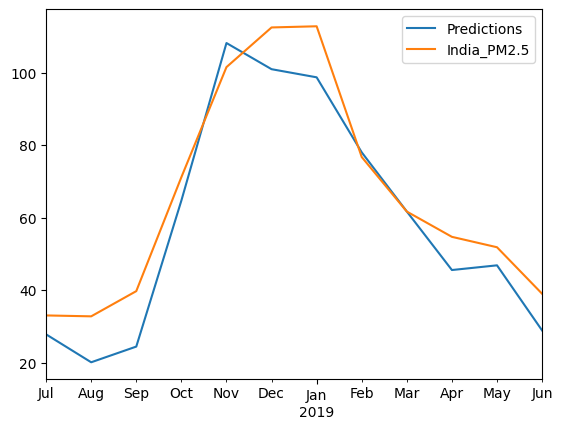

In [25]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [26]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean PM2.5',test.mean())

RMSE =  9.370150751124644
Mean PM2.5 65.65374179782086


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33553D+00    |proj g|=  2.10136D-01

At iterate    5    f=  4.27407D+00    |proj g|=  6.30718D-02

At iterate   10    f=  4.19828D+00    |proj g|=  9.88219D-03

At iterate   15    f=  4.19550D+00    |proj g|=  2.24139D-03

At iterate   20    f=  4.19397D+00    |proj g|=  3.07256D-02

At iterate   25    f=  4.18873D+00    |proj g|=  6.65937D-04

At iterate   30    f=  4.18848D+00    |proj g|=  3.18708D-03

At iterate   35    f=  4.18825D+00    |proj g|=  1.90098D-03

At iterate   40    f=  4.18816D+00    |proj g|=  6.71258D-04

At iterate   45    f=  4.18816D+00    |proj g|=  3.56144D-04


 This problem is unconstrained.



At iterate   50    f=  4.18815D+00    |proj g|=  3.98681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80      1     0     0   3.987D-04   4.188D+00
  F =   4.1881525784831108     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


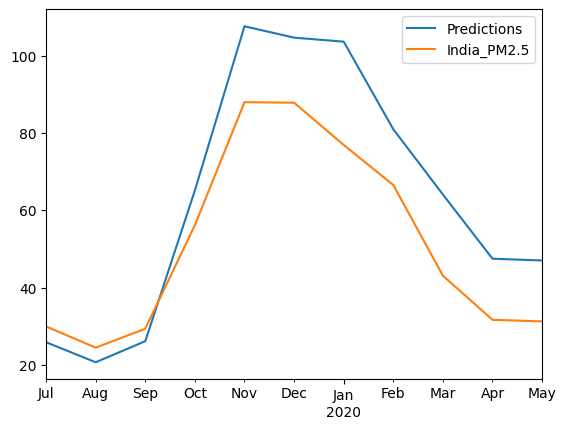

In [27]:
#dividing into train and test:
train=India_PM2_5[:53]
test=India_PM2_5[54:]
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [28]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean',test.mean())

RMSE =  15.528571224163906
Mean 51.361404711339176


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46049D+00    |proj g|=  3.87956D-01

At iterate    5    f=  4.35188D+00    |proj g|=  2.49578D-02

At iterate   10    f=  4.31991D+00    |proj g|=  1.55654D-02

At iterate   15    f=  4.31381D+00    |proj g|=  1.60188D-03

At iterate   20    f=  4.31311D+00    |proj g|=  2.37569D-03

At iterate   25    f=  4.31297D+00    |proj g|=  1.52813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   

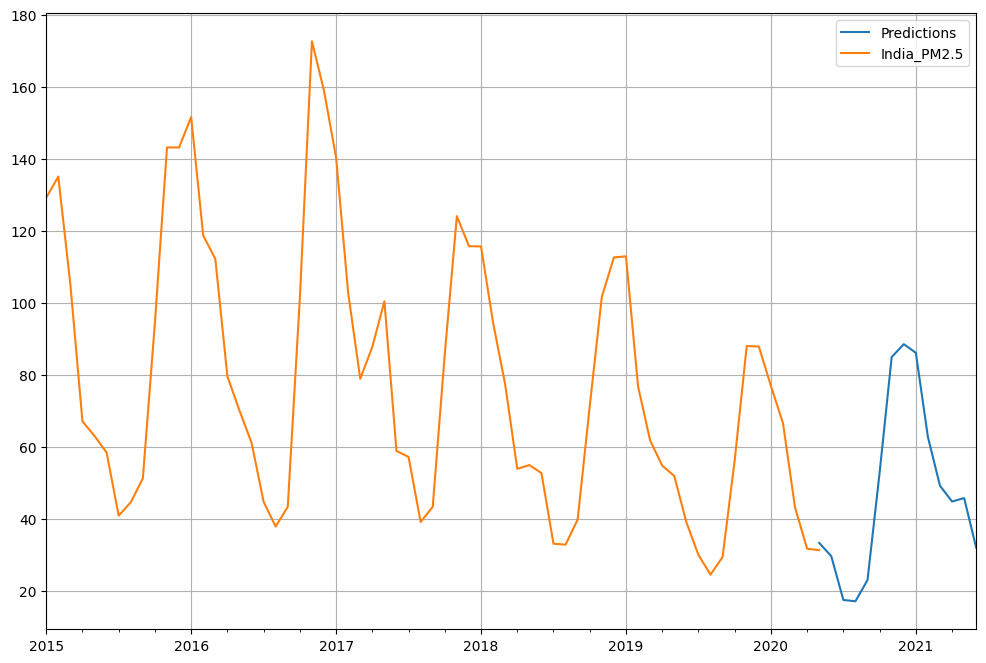

In [29]:
# Forming the model:
model=SARIMAX(India_PM2_5,order=(2,0,0),seasonal_order=(1,0,1,24))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_PM2_5.plot(legend=True,figsize=(12,8),grid=True);

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53959D+00    |proj g|=  2.72286D-01

At iterate    5    f=  4.44885D+00    |proj g|=  7.98970D-02

At iterate   10    f=  4.38276D+00    |proj g|=  7.95070D-02

At iterate   15    f=  4.36967D+00    |proj g|=  4.18383D-03

At iterate   20    f=  4.36712D+00    |proj g|=  7.35317D-03

At iterate   25    f=  4.36646D+00    |proj g|=  4.39150D-03

At iterate   30    f=  4.36631D+00    |proj g|=  2.42038D-03

At iterate   35    f=  4.36626D+00    |proj g|=  1.12515D-03

At iterate   40    f=  4.36625D+00    |proj g|=  1.12873D-04

At iterate   45    f=  4.36624D+00    |proj g|=  2.07422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


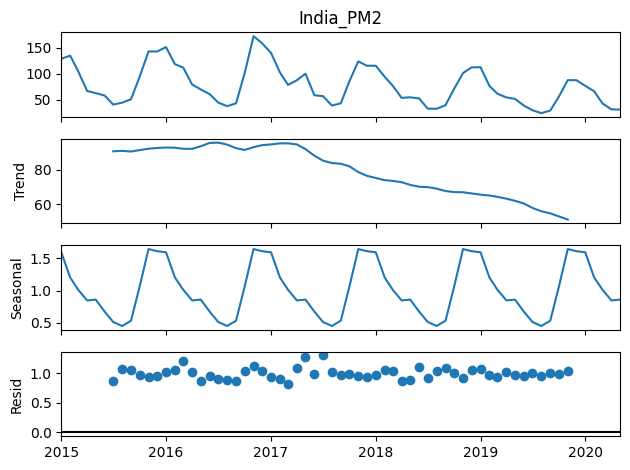

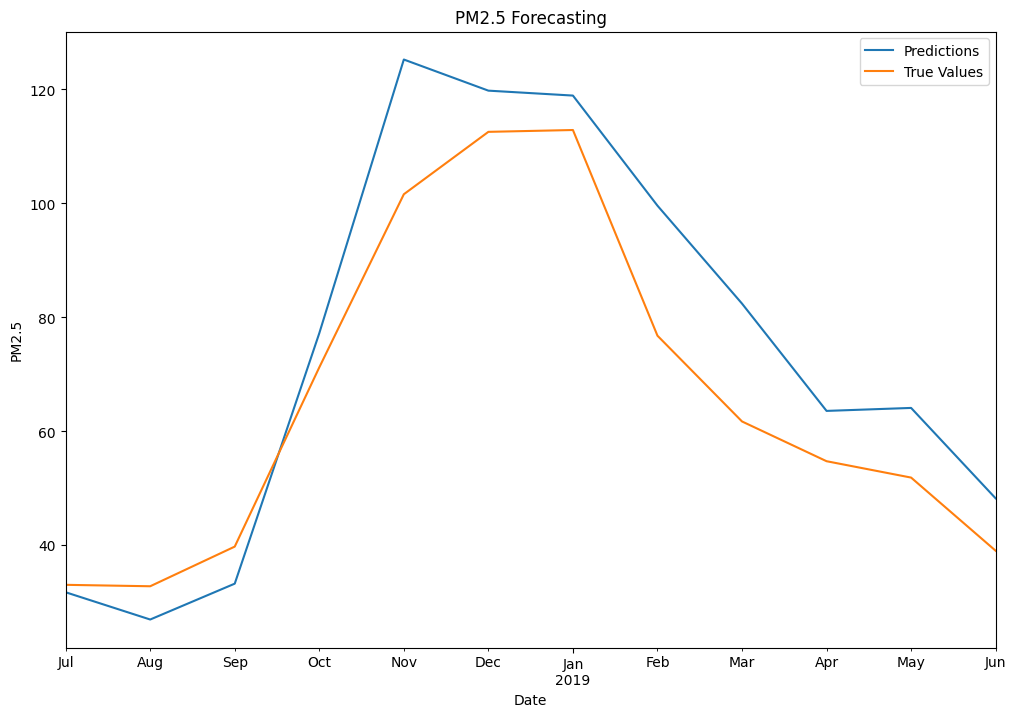

RMSE: 12.986509081160905
Mean PM10 (test data): 65.65374179782086
Forecasted PM2.5 for 2020-06-01: 49.13040719674096


In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['City', 'Date', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'SO2', 'NO2', 'CO']]
cities = pd.unique(df['City'])
column1 = cities + 'PM2.5'
column2 = cities + '_AQI_'
columns = [*column1, *column2]
final_df = pd.DataFrame(index=np.arange('2015-01-01', '2020-05-02', dtype='datetime64[D]'), columns=column1)

for city, i in zip(cities, final_df.columns):
    n = len(np.array(df[df['City'] == city]['PM2.5']))
    final_df[i][-n:] = np.array(df[df['City'] == city]['PM2.5'])

final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

final_df['India_PM2'] = final_df.mean(axis=1)

# Plot seasonal decomposition
India_PM2 = final_df['India_PM2']
result = seasonal_decompose(India_PM2, model='multiplicative')
result.plot();

# Load specific forecasting tools
auto_arima_result = auto_arima(y=India_PM2, start_p=0, start_P=0, start_q=0, start_Q=0, seasonal=True, m=12)

# Divide into train and test
train = India_PM2[:41]
test = India_PM2[42:54]

# Forming the model
model = SARIMAX(train, order=(2, 0, 0), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Obtain predicted values for the specific date
specific_date = '2020-06-01'
forecast = results.get_prediction(start=pd.to_datetime(specific_date), end=pd.to_datetime(specific_date), dynamic=False)
predicted_PM2_specific_date = forecast.predicted_mean.values[0]

# Plotting
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
plt.figure(figsize=(12, 8))
predictions.plot(legend=True, label='Predictions')
test.plot(legend=True, label='True Values')
plt.title('PM2.5 Forecasting')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(predictions, test))
print('RMSE:', RMSE)
print('Mean PM2.5 (test data):', test.mean())
print(f'Forecasted PM2.5 for {specific_date}: {predicted_PM2_specific_date}')

In [32]:
import pickle


# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm2_5.pkl', 'wb') as file:
    pickle.dump(results, file)

In [33]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm2_5.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the specific date for forecasting
specific_date = '2020-06-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted PM2.5 value for {specific_date} is: {predicted_value}")


The forecasted PM2.5 value for 2020-06-01 is: 49.13040719674096
